<a href="https://colab.research.google.com/github/ncsu-landscape-dynamics/LAMP_assay_automation/blob/main/readDNGsavePNG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab import drive
import imageio
import scipy.misc
import skimage.filters
import skimage.metrics
from PIL import Image
import pandas as pd

In [2]:
!pip install rawpy
import rawpy

     |████████████████████████████████| 1.7 MB 7.2 MB/s 


In [3]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [12]:
# This may be removed. Considering whether or not to read raw image and convert
# over to tensor in this one script.
import torch
import torch.utils.data
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
from torchvision.io import read_image
from torchvision.transforms.functional import convert_image_dtype
import torchvision.transforms.functional as F

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [4]:
os.chdir("/content/drive/MyDrive/APHIS Farm Bill (2020Milestones)/Protocols/For John/images/New set for John")

In [ ]:
rawimgs = sorted(os.listdir("input"))
rawimgs_dir = list()

for i in range(len(rawimgs)):
    rawimgs_dir.append(os.path.join("/content/drive/MyDrive/APHIS Farm Bill (2020Milestones)/Protocols/For John/images/New set for John/input" , rawimgs[i]))

In [132]:
raw_in_list = list()
post_im_list = list()

for r in range(len(rawimgs_dir)):
    raw_in_list.append(rawpy.imread(rawimgs_dir[r]))
    post_im_list.append(raw_in_list[r].postprocess(use_camera_wb=True))
    if post_im_list[r].shape[0] < post_im_list[r].shape[1]:
        post_im_list[r] = np.rot90(post_im_list[r], 3)
        print("Note: horizontal images detected. Inspect orientation.")

Note: horizontal images detected. Inspect orientation.
Note: horizontal images detected. Inspect orientation.
Note: horizontal images detected. Inspect orientation.
Note: horizontal images detected. Inspect orientation.
Note: horizontal images detected. Inspect orientation.
Note: horizontal images detected. Inspect orientation.
Note: horizontal images detected. Inspect orientation.
Note: horizontal images detected. Inspect orientation.
Note: horizontal images detected. Inspect orientation.
Note: horizontal images detected. Inspect orientation.
Note: horizontal images detected. Inspect orientation.
Note: horizontal images detected. Inspect orientation.


In [39]:
tt1 = Image.open("/content/drive/MyDrive/APHIS Farm Bill (2020Milestones)/Protocols/For John/images/New set for John/zeros_png/set1_00m.png")

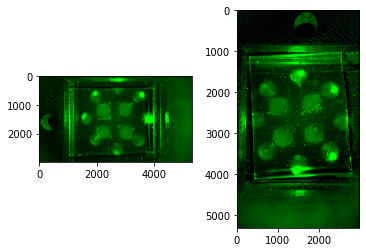

In [34]:
plt.subplot(1,2,1)
plt.imshow(post_im_list[0])
plt.subplot(1,2,2)
plt.imshow(post_im_list[6])

In [137]:
# The if statement here is dodgy. An array or tensor has shape AND size. Only
# the PIL Images have only shape. Tried using type(img), but that's only for
# base types, like "str" or "int".
def centercrop(img, newsize):
    if hasattr(img, "shape"):
        height, width = img.shape[:2]   # Get dimensions
        img = Image.fromarray(img)
        print("img is tensor or np.array. widt = {}, height = {}".format(width,height))
    else:
        width, height = img.size   # Get dimensions
        print("img is PIL. widt = {}, height = {}".format(width,height))
    left = int((width - int(newsize))/2)
    top = int((height - int(newsize))/2)
    bottom = int(height - top)
    right = int(width - left)
    # Crop the center of the image
    ccrp = img.crop((left, top, right, bottom))
    return ccrp 

In [138]:
cencrop_lis = list()

for i in range(len(post_im_list)):
    cencrop_lis.append(centercrop(post_im_list[i], 1600))

img is tensor or np.array. widt = 2988, height = 5312
img is tensor or np.array. widt = 2988, height = 5312
img is tensor or np.array. widt = 2988, height = 5312
img is tensor or np.array. widt = 2988, height = 5312
img is tensor or np.array. widt = 2988, height = 5312
img is tensor or np.array. widt = 2988, height = 5312
img is tensor or np.array. widt = 2988, height = 5312
img is tensor or np.array. widt = 2988, height = 5312
img is tensor or np.array. widt = 2988, height = 5312
img is tensor or np.array. widt = 2988, height = 5312
img is tensor or np.array. widt = 2988, height = 5312
img is tensor or np.array. widt = 2988, height = 5312
img is tensor or np.array. widt = 2988, height = 5312
img is tensor or np.array. widt = 2988, height = 5312
img is tensor or np.array. widt = 2988, height = 5312
img is tensor or np.array. widt = 2988, height = 5312
img is tensor or np.array. widt = 2988, height = 5312
img is tensor or np.array. widt = 2988, height = 5312
img is tensor or np.array. w

In [ ]:
def reprocess(x,y):
    imt = rawpy.imread(x)
    imt = imt.postprocess(use_camera_wb=True)
    plt.imshow(imt)
    imt = Image.fromarray(imt)
    imt.save(y)

In [139]:
# For saving the images
newnamelis = list()
png_names_path = list()

for i in range(len(rawimgs)):
    newnamelis.append(rawimgs[i].replace("dng","png"))
    png_names_path.append(os.path.join("/content/drive/MyDrive/APHIS Farm Bill (2020Milestones)/Protocols/For John/images/New set for John/centercroptest/", newnamelis[i]))
    cencrop_lis[i].save(png_names_path[i])

In [ ]:
plt.figure(figsize=(40,20))
plt.subplot(6,4,1)
plt.imshow(post_im_list[0])
plt.subplot(6,4,2)
plt.imshow(post_im_list[1])
plt.subplot(6,4,3)
plt.imshow(post_im_list[2])
plt.subplot(6,4,4)
plt.imshow(post_im_list[3])
plt.subplot(6,4,5)
plt.imshow(post_im_list[4])
plt.subplot(6,4,6)
plt.imshow(post_im_list[5])
plt.subplot(6,4,7)
plt.imshow(post_im_list[6])
plt.subplot(6,4,8)
plt.imshow(post_im_list[7])
plt.subplot(6,4,9)
plt.imshow(post_im_list[8])
plt.subplot(6,4,10)
plt.imshow(post_im_list[9])
plt.subplot(6,4,11)
plt.imshow(post_im_list[10])
plt.subplot(6,4,12)
plt.imshow(post_im_list[11])

plt.subplot(6,4,13)
plt.imshow(post_im_list[12])
plt.subplot(6,4,14)
plt.imshow(post_im_list[13])
plt.subplot(6,4,15)
plt.imshow(post_im_list[14])
plt.subplot(6,4,16)
plt.imshow(post_im_list[15])
plt.subplot(6,4,17)
plt.imshow(post_im_list[16])
plt.subplot(6,4,18)
plt.imshow(post_im_list[17])
plt.subplot(6,4,19)
plt.imshow(post_im_list[18])
plt.subplot(6,4,20)
plt.imshow(post_im_list[19])
plt.subplot(6,4,21)
plt.imshow(post_im_list[20])
plt.subplot(6,4,22)
plt.imshow(post_im_list[21])
plt.subplot(6,4,23)
plt.imshow(post_im_list[22])
plt.subplot(6,4,24)
plt.imshow(post_im_list[23])

In [19]:
# Read raw and convert to tensor. 
t1 = rawpy.imread(rawimgs_dir[0])
t1 = t1.postprocess(use_camera_wb=True)

t2 = torch.tensor(t1)
t3 = t2.to(device)

# Change Torch-based image read to shape that plt can render. (4,1600,1600) 
# to (1600,1600,4) 
t4 = t1.permute(1,2,0)

t4 = convert_image_dtype(t3, dtype=torch.float)

type(t1),type(t2),type(t3),type(t4)
#(numpy.ndarray, torch.Tensor, torch.Tensor, torch.Tensor)

In [ ]:
# Not necessary. This manually resizes files.
#img1.size
#newsize = 1600
#width, height = img1.size   # Get dimensions
#left = int((width - int(newsize))/2)
#top = int((height - int(newsize))/2)
#bottom = int(height - top)
#right = int(width - left)
# Crop the center of the image
#left, top, right, bottom
# (694, 1856, 2294, 3456)